In [1]:
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import talib


#start date 
start = datetime.datetime(2010,2,25)
#end date
end = datetime.datetime(2020,2,25)



df1 = pdr.get_data_yahoo('SPY',start,end)

In [2]:
SPY = df1.copy()
SPY.drop(['High', 'Low', 'Open', 'Close', 'Volume'],axis=1,inplace=True)


SPY['RSI'] = talib.RSI(SPY['Adj Close'])


SPY.dropna(inplace=True,axis=0)
SPY = SPY.reset_index()

SPY.head()

,Date,Adj Close,RSI
0,2010-03-16,93.257500,97.453700
1,2010-03-17,93.810265,97.738952
2,2010-03-18,93.762215,96.724589
3,2010-03-19,93.287605,87.108183
4,2010-03-22,93.786324,88.411923


In [3]:
def backtesting_RSI(df, TP_level, SL_level):
    df['entry_price']=0
    df['RSI_signal']=0


    
    n =df.shape[0]
    cash=1
    stock=0


    
    for i in range(0,n):

        if df['RSI'].loc[i] <= 30 and cash == 1:
            df['RSI_signal'].loc[i]=1
            df['entry_price'].loc[i]=df['Adj Close'].loc[i]

            cash=0
            stock=1

        if  stock == 1 and df['RSI'].loc[i] >= 70 :
            df['RSI_signal'].loc[i]= -1
            cash=1
            stock=0


    df['take_profit_price'] = df['entry_price']*(1+ TP_level)
    df['stop_loss_price'] = df['entry_price']*(1- SL_level)

    df['take_profit_price']=df['take_profit_price'].replace(to_replace=0,method='ffill')
    df['stop_loss_price']=df['stop_loss_price'].replace(to_replace=0,method='ffill')

   
    
    for i in range(0,n):
        
        if  df['Adj Close'].loc[i]<df['stop_loss_price'].loc[i] or df['Adj Close'].loc[i]>df['take_profit_price'].loc[i] :
            df['RSI_signal'].loc[i]= -1



    
    df['RSI_signal']=df['RSI_signal'].replace(to_replace=0,method='ffill')

   
    df['position']=df['RSI_signal'].replace(to_replace=-1,value=0)


    y= df['RSI'].plot(figsize=(30,10))
    l1=np.array([30 for i in range(n)])
    l2=np.array([70 for i in range(n)])
    plt.plot(l1)
    plt.plot(l2)
    df['position'].plot(ax=y, secondary_y='position')
    plt.title('Visualizing the startegy with position overlaid on RSI')
    plt.show()

    
    
    df['daily_log_returns']= np.log(df['Adj Close']/df['Adj Close'].shift())
    df['strategy_returns'] = df['daily_log_returns']*df['position'].shift()
    df['cumulative_strategy_returns']= np.cumsum(df['strategy_returns'])
    print('total return from this strategy:',df['strategy_returns'].sum())
    df['cumulative_strategy_returns'].plot()
    plt.title('Cumulative returns for this strategy')
    plt.show()

    
    return df

C:\Users\nh303\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


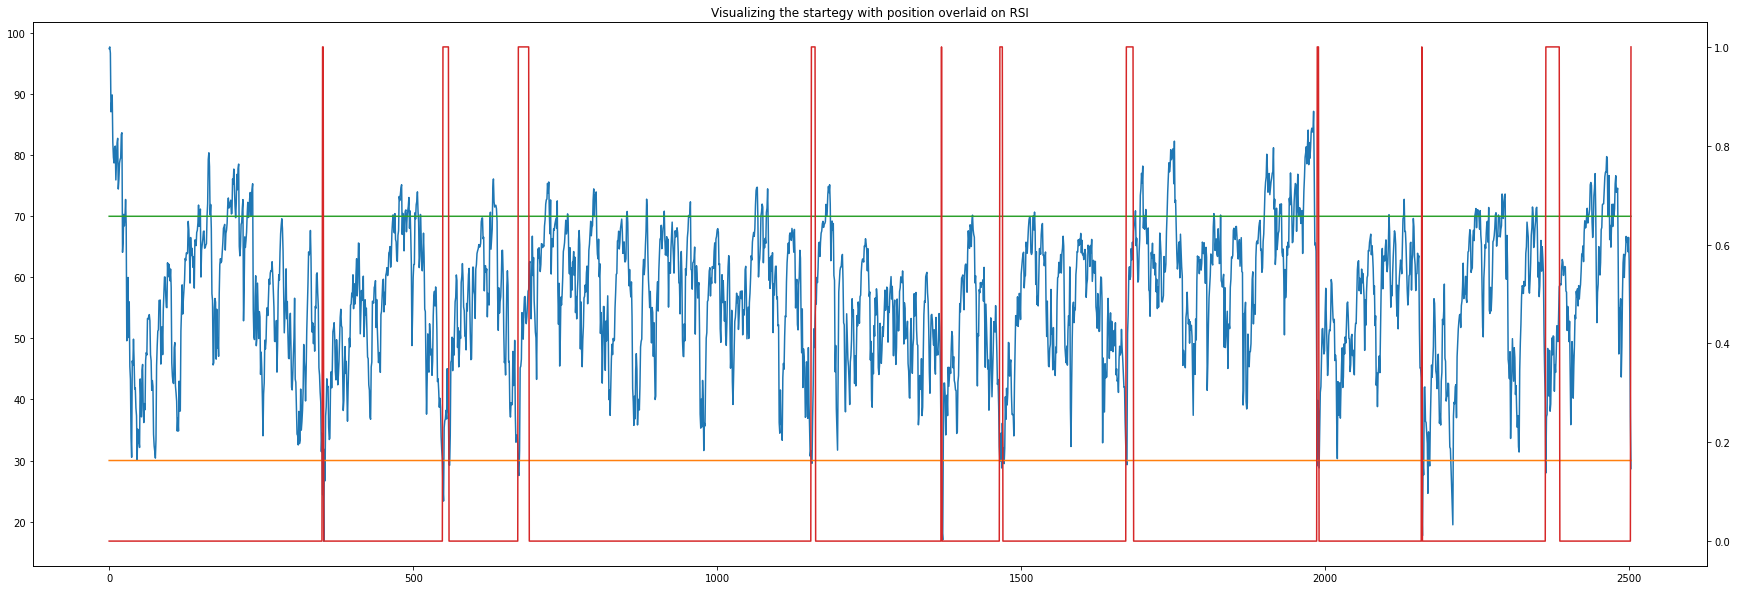

total return from this strategy: 0.007190778469816007


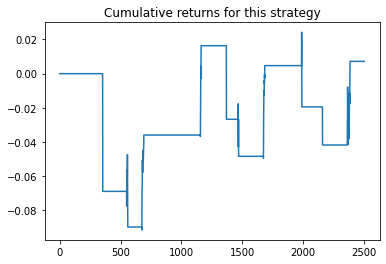

,Date,Adj Close,RSI,entry_price,RSI_signal,take_profit_price,stop_loss_price,position,daily_log_returns,strategy_returns,cumulative_strategy_returns
0,2010-03-16,93.257500,97.453700,0.000000,-1,0.000000,0.000000,0,NaN,NaN,NaN
1,2010-03-17,93.810265,97.738952,0.000000,-1,0.000000,0.000000,0,0.005910,0.0,0.000000
2,2010-03-18,93.762215,96.724589,0.000000,-1,0.000000,0.000000,0,-0.000512,-0.0,0.000000
3,2010-03-19,93.287605,87.108183,0.000000,-1,0.000000,0.000000,0,-0.005075,-0.0,0.000000
4,2010-03-22,93.786324,88.411923,0.000000,-1,0.000000,0.000000,0,0.005332,0.0,0.000000
5,2010-03-23,94.445946,89.870970,0.000000,-1,0.000000,0.000000,0,0.007009,0.0,0.000000
6,2010-03-24,93.987427,82.129819,0.000000,-1,0.000000,0.000000,0,-0.004867,-0.0,0.000000
7,2010-03-25,93.834595,79.666593,0.000000,-1,0.000000,0.000000,0,-0.001627,-0.0,0.000000
8,2010-03-26,93.778282,78.729642,0.000000,-1,0.000000,0.000000,0,-0.000600,-0.0,0.000000
9,2010-03-29,94.373550,81.241174,0.000000,-1,0.000000,0.000000,0,0.006328,0.0,0.000000


In [4]:
backtesting_RSI(SPY, TP_level = 0.05, SL_level = 0.02 )